In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#---Open the look-up-table made in water_vapor_abs
mass_ext_df_13 = pd.read_pickle('tables/mass_ext_band13')
mass_ext_df_14 = pd.read_pickle('tables/mass_ext_band14')
mass_ext_df_07 = pd.read_pickle('tables/mass_ext_band07')

#---Open the optical mass made in water_vapor_profile
optical_mass_df = pd.read_pickle('tables/optical_mass_example')

In [3]:
mass_ext_df_13

,1013.171226,962.512665,911.854103,861.195542,810.536981,759.878419,709.219858,658.561297,607.902736,557.244174,506.585613,455.927052,405.268490,354.609929,303.951368,253.292806,202.634245,151.975684,101.317123,50.658561
175,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,0.000089,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090
180,0.000112,0.000112,0.000112,0.000112,0.000113,0.000113,0.000113,0.000113,0.000113,0.000113,0.000113,0.000113,0.000113,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114
185,0.000140,0.000141,0.000141,0.000141,0.000141,0.000141,0.000141,0.000141,0.000141,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142
190,0.000174,0.000174,0.000174,0.000175,0.000175,0.000175,0.000175,0.000175,0.000175,0.000176,0.000176,0.000176,0.000176,0.000176,0.000176,0.000176,0.000176,0.000176,0.000176,0.000176
195,0.000214,0.000214,0.000214,0.000215,0.000215,0.000215,0.000215,0.000215,0.000216,0.000216,0.000216,0.000216,0.000216,0.000216,0.000217,0.000217,0.000217,0.000217,0.000217,0.000217
200,0.000261,0.000261,0.000261,0.000262,0.000262,0.000262,0.000262,0.000262,0.000263,0.000263,0.000263,0.000263,0.000263,0.000264,0.000264,0.000264,0.000264,0.000264,0.000264,0.000264
205,0.000315,0.000316,0.000316,0.000316,0.000317,0.000317,0.000317,0.000317,0.000318,0.000318,0.000318,0.000318,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319,0.000319
210,0.000379,0.000379,0.000379,0.000380,0.000380,0.000380,0.000381,0.000381,0.000381,0.000382,0.000382,0.000382,0.000382,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383,0.000383
215,0.000451,0.000452,0.000452,0.000453,0.000453,0.000453,0.000454,0.000454,0.000455,0.000455,0.000455,0.000456,0.000456,0.000456,0.000456,0.000457,0.000457,0.000457,0.000457,0.000457
220,0.000535,0.000535,0.000536,0.000536,0.000537,0.000537,0.000538,0.000538,0.000538,0.000539,0.000539,0.000540,0.000540,0.000540,0.000541,0.000541,0.000541,0.000541,0.000541,0.000541


In [4]:
optical_mass_df

,Optical Mass,Temperature
1000.0,1.470607,298.361359
975.0,1.384706,296.960083
950.0,1.300575,295.527649
925.0,1.218317,294.047638
900.0,2.215604,292.535461
850.0,2.021903,288.929932
800.0,1.947671,284.115479
750.0,1.890161,278.982178
700.0,1.437260,273.714355
650.0,0.632121,269.702179


Using look-up-table:

In [5]:
temperature_point = 270
pressure_point = 800

#---Find the nearest temperature and pressure indices
nearest_temperature = mass_ext_df_13.index[((mass_ext_df_13.index.values - temperature_point)**2).argmin()]
nearest_pressure = mass_ext_df_13.columns[((mass_ext_df_13.columns.values - pressure_point)**2).argmin()]

#---Query the lookup table with the nearest indices
nearest_value = mass_ext_df_13.loc[nearest_temperature, nearest_pressure]

print("Nearest temperature:", nearest_temperature)
print("Nearest pressure:", nearest_pressure)
print("Nearest value in the lookup table:", nearest_value)

Nearest temperature: 270
Nearest pressure: 810.5369807497465
Nearest value in the lookup table: 0.0022104093575438144


In [6]:
optical_thickness_07 = []
optical_thickness_13 = []
optical_thickness_14 = []

#pressure_profile = range(1000, 0, -100)
pressure_profile = optical_mass_df.index[:21]

for pressure_value in pressure_profile:
    temperature_value = optical_mass_df.loc[pressure_value].Temperature
    optical_mass_value = optical_mass_df.loc[pressure_value]['Optical Mass']

    #---Find the nearest temperature and pressure indices
    nearest_temperature_07 = mass_ext_df_07.index[((mass_ext_df_07.index.values - temperature_value)**2).argmin()]
    nearest_pressure_07 = mass_ext_df_07.columns[((mass_ext_df_07.columns.values - pressure_value)**2).argmin()]

    nearest_temperature_13 = mass_ext_df_13.index[((mass_ext_df_13.index.values - temperature_value)**2).argmin()]
    nearest_pressure_13 = mass_ext_df_13.columns[((mass_ext_df_13.columns.values - pressure_value)**2).argmin()]

    nearest_temperature_14 = mass_ext_df_14.index[((mass_ext_df_14.index.values - temperature_value)**2).argmin()]
    nearest_pressure_14 = mass_ext_df_14.columns[((mass_ext_df_14.columns.values - pressure_value)**2).argmin()]

    #---Query the lookup table with the nearest indices
    mass_ext_value_07 = mass_ext_df_07.loc[nearest_temperature_07, nearest_pressure_07]
    mass_ext_value_13 = mass_ext_df_13.loc[nearest_temperature_13, nearest_pressure_13]
    mass_ext_value_14 = mass_ext_df_14.loc[nearest_temperature_14, nearest_pressure_14]

    print("Profile:", pressure_value, round(temperature_value, 1), "LUT:", round(nearest_pressure_07,1), nearest_temperature_07)
    #print("Optical mass:", round(optical_mass_value,1), "Mass ext:", round(mass_ext_value_13,1))

    optical_thickness_07.append(optical_mass_value*mass_ext_value_07)
    optical_thickness_13.append(optical_mass_value*mass_ext_value_13)
    optical_thickness_14.append(optical_mass_value*mass_ext_value_14)



Profile: 1000.0 298.4 LUT: 1013.2 300
Profile: 975.0 297.0 LUT: 962.5 295
Profile: 950.0 295.5 LUT: 962.5 295
Profile: 925.0 294.0 LUT: 911.9 295
Profile: 900.0 292.5 LUT: 911.9 295
Profile: 850.0 288.9 LUT: 861.2 290
Profile: 800.0 284.1 LUT: 810.5 285
Profile: 750.0 279.0 LUT: 759.9 280
Profile: 700.0 273.7 LUT: 709.2 275
Profile: 650.0 269.7 LUT: 658.6 270
Profile: 600.0 266.4 LUT: 607.9 265
Profile: 550.0 262.7 LUT: 557.2 265
Profile: 500.0 258.0 LUT: 506.6 260
Profile: 450.0 251.4 LUT: 455.9 250
Profile: 400.0 247.4 LUT: 405.3 245
Profile: 350.0 242.5 LUT: 354.6 245
Profile: 300.0 236.6 LUT: 304.0 235
Profile: 250.0 231.9 LUT: 253.3 230
Profile: 200.0 221.4 LUT: 202.6 220
Profile: 150.0 215.4 LUT: 152.0 215
Profile: 100.0 210.5 LUT: 101.3 210


I believe optical thickness should be on the scale of 0.1 to 10, roughly.

In [7]:
data_07 = {
    'Optical Thickness': optical_thickness_07
}
optical_thickness_07_df = pd.DataFrame(data_07, index=pressure_profile)

data_13 = {
    'Optical Thickness': optical_thickness_13
}
optical_thickness_13_df = pd.DataFrame(data_13, index=pressure_profile)

data_14 = {
    'Optical Thickness': optical_thickness_14
}
optical_thickness_14_df = pd.DataFrame(data_14, index=pressure_profile)

/var/folders/pd/x01_y6d52zj47w6_m5_h_8f80000gr/T/ipykernel_39352/3975920564.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(minor='off',labels=yticklabels)


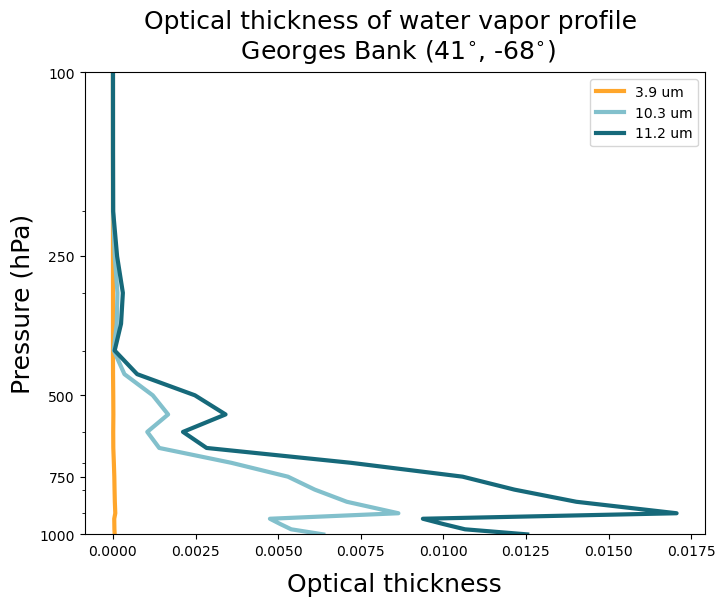

In [8]:
fig, ax = plt.subplots(1, figsize=(8,6))

ax.plot(optical_thickness_07_df, optical_thickness_07_df.index, c='#FFA62B', linewidth=3, label="3.9 um")
ax.plot(optical_thickness_13_df, optical_thickness_13_df.index, c='#82C0CC', linewidth=3, label="10.3 um")
ax.plot(optical_thickness_14_df, optical_thickness_14_df.index, c='#16697A', linewidth=3, label="11.2 um")
ax.legend()

ax.set_title('Optical thickness of water vapor profile \n Georges Bank (41$^{\circ}$, -68$^{\circ}$)', size=18, pad=10)
ax.set_xlabel('Optical thickness', size=18, labelpad=10)
ax.set_ylabel('Pressure (hPa)', size=18)

#---Y-labels took some wrangling
plt.yscale('log')
ax.set_ylim([1000,100])
ax.set_yticks([1000,750,500,250,100])
yticklabels = ['1000','750','500','250','100']
ax.set_yticklabels(yticklabels)
plt.gca().set_yticklabels(minor='off',labels=yticklabels)

plt.show()

Calculating transmittance from optical thickness ($\tau$):
* $\mu_{\text{sat}}$ refers to the viewing angle of the satellite

$$
T_\lambda(z, \text{TOA}) = \text{exp}\left(-\sum_z^\text{TOA} \tau(z)\right)
$$

Optical thickness ($\tau$) is the product of absorbance and mass density of water, for each layer ($z$). In order to get total transmittance through the layers, we need to sum the thickness values.

In [9]:
#---Simply summing the transmittance

#---Using zenith satellite view
u_sat = 1

T_07 = np.exp(-optical_thickness_07_df['Optical Thickness'].sum()/u_sat)
T_13 = np.exp(-optical_thickness_13_df['Optical Thickness'].sum()/u_sat)
T_14 = np.exp(-optical_thickness_14_df['Optical Thickness'].sum()/u_sat)

print("T(3.9um):", round(T_07, 2))
print("T(10.3um):", round(T_13, 2))
print("T(11.2um):", round(T_14, 2))


T(3.9um): 1.0
T(10.3um): 0.94
T(11.2um): 0.89


Calculating the weighting function for each band: 

$$
dT = \text{exp}\left(-\left[\sum_0^{z+1} \tau(z) - \sum_0^{z} \tau(z)\right] \right)
$$

In [10]:
#---Calculating the dT/dz with height

weighting_07 = []
weighting_13 = []
weighting_14 = []

z_len = len(optical_thickness_07_df)

for i in range(z_len-1):
    dT = (np.exp(-optical_thickness_07_df.iloc[:i+1].sum().values/u_sat)[0]) - (np.exp(-optical_thickness_07_df.iloc[:i].sum().values/u_sat)[0])
    dz = optical_thickness_07_df.index[i+1] - optical_thickness_07_df.index[i]
    weighting_07.append(dT/dz)

for i in range(z_len-1):
    dT = (np.exp(-optical_thickness_13_df.iloc[:i+1].sum().values/u_sat)[0]) - (np.exp(-optical_thickness_13_df.iloc[:i].sum().values/u_sat)[0])
    dz = optical_thickness_13_df.index[i+1] - optical_thickness_13_df.index[i]
    weighting_13.append(dT/dz)

for i in range(z_len-1):
    dT = (np.exp(-optical_thickness_14_df.iloc[:i+1].sum().values/u_sat)[0]) - (np.exp(-optical_thickness_14_df.iloc[:i].sum().values/u_sat)[0])
    dz = optical_thickness_14_df.index[i+1] - optical_thickness_14_df.index[i]
    weighting_14.append(dT/dz)

/var/folders/pd/x01_y6d52zj47w6_m5_h_8f80000gr/T/ipykernel_39352/3106655078.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(minor='off',labels=yticklabels)


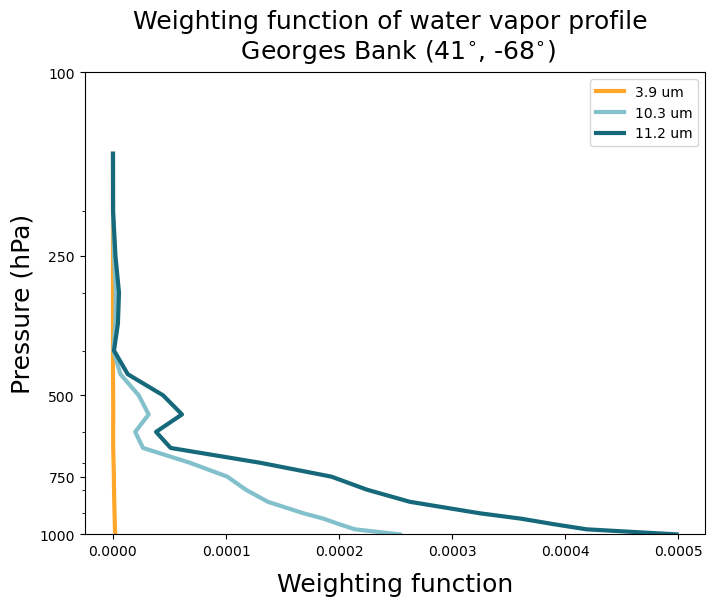

In [11]:
fig, ax = plt.subplots(1, figsize=(8,6))

ax.plot(weighting_07, optical_thickness_07_df.index[:z_len-1], c='#FFA62B', linewidth=3, label="3.9 um")
ax.plot(weighting_13, optical_thickness_13_df.index[:z_len-1], c='#82C0CC', linewidth=3, label="10.3 um")
ax.plot(weighting_14, optical_thickness_14_df.index[:z_len-1], c='#16697A', linewidth=3, label="11.2 um")

ax.legend()

ax.set_title('Weighting function of water vapor profile \n Georges Bank (41$^{\circ}$, -68$^{\circ}$)', size=18, pad=10)
ax.set_xlabel('Weighting function', size=18, labelpad=10)
ax.set_ylabel('Pressure (hPa)', size=18)

#---Y-labels took some wrangling
plt.yscale('log')
ax.set_ylim([1000,100])
ax.set_yticks([1000,750,500,250,100])
yticklabels = ['1000','750','500','250','100']
ax.set_yticklabels(yticklabels)
plt.gca().set_yticklabels(minor='off',labels=yticklabels)

plt.show()